In [12]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as time
import functions as f


def calculate_and_solve(framework):
	
	### calculate each position array###
	v_poss=f.list_verticle_framework(framework)
	h_poss=f.list_horizontal_framework(framework)
	b_poss=f.list_box_framework(framework)
	framework_with_positional_element = f.generate_positional_array(framework)
	### solve ####
	status,remain_possible=f.solve(framework_with_positional_element,framework,1,v_poss,h_poss,b_poss)
	return [framework,status,remain_possible]

def solve_multiple_times(new_sudoku,times,need_conversion=1):
	### convert into 3,3,3,3 dimension###
	if need_conversion==1:
		sudoku=f.create_framework(new_sudoku)
	else:
		sudoku = new_sudoku
	for i in range(times):
		sudoku,status,remain_possible=calculate_and_solve(sudoku)
		if status == 0 : return {'sudoku':sudoku,"loops":i,"status":status,"remaining":remain_possible}
	return {'sudoku':sudoku,"loops":i,"status":status,"remaining":remain_possible}

In [27]:
## specify variables
difficulty=0.5
times=10

### generate sudoku ####
new_sudoku=f.generate_sudoku(difficulty)
t0=time.now()
#### calculate and solve###
final_sudoku=solve_multiple_times(new_sudoku,times)

print(f"sudoku is {'solved' if final_sudoku['status'] == 0 else 'not solved '+str(final_sudoku['status'])} after {final_sudoku['loops']} loops.\n time taken is {(time.now()-t0).total_seconds()*1000} ms \n with {final_sudoku['remaining']} still possible")
if (final_sudoku['status']==1):
      print(final_sudoku['sudoku'][final_sudoku['remaining']['position'][0]][0])
      #print(final_sudoku['remaining']['position'][0])
      #solve_multiple_times(final_sudoku['sudoku'],10,need_conversion==0)
#### save to file ####
np.save("solved", final_sudoku['sudoku'])

Answer:
 [[4 3 9 1 2 8 6 5 7]
 [6 1 7 5 9 3 4 8 2]
 [2 5 8 6 4 7 1 9 3]
 [7 2 1 9 3 5 8 4 6]
 [3 6 4 2 8 1 5 7 9]
 [9 8 5 7 6 4 3 2 1]
 [1 9 6 8 5 2 7 3 4]
 [8 7 3 4 1 9 2 6 5]
 [5 4 2 3 7 6 9 1 8]]

Masked anwser:
 [[0 3 0 0 2 8 0 5 0]
 [6 0 7 5 0 0 4 0 2]
 [2 5 8 0 0 0 1 9 0]
 [0 2 0 9 0 0 0 0 0]
 [3 6 0 0 0 0 0 0 9]
 [0 8 0 7 0 0 0 2 0]
 [1 9 0 0 0 2 7 0 4]
 [0 0 0 4 0 9 2 0 0]
 [5 4 2 3 7 0 0 0 8]]
replace index 0011 with 1
replace index 0211 with 7
replace index 1020 with 6
replace index 2000 with 6
replace index 0210 with 8
replace index 1000 with 1
replace index 1012 with 3
replace index 1200 with 8
replace index 2002 with 7
replace index 2220 with 9
replace index 1011 with 9
replace index 1021 with 4
replace index 1110 with 2
replace index 2011 with 8
replace index 2022 with 3
replace index 1022 with 7
sudoku is not solved 1 after 9 loops.
 time taken is 37.253 ms 
 with {'position': [[0, 0, 0, 0], [0, 0, 0, 2], [0, 1, 0, 0], [0, 1, 0, 2], [0, 1, 1, 2], [0, 1, 2, 0], [0, 1, 2, 

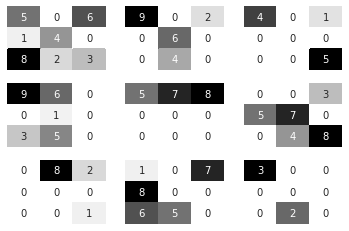

In [3]:
f.plot(np.load('puzzle.npy'))

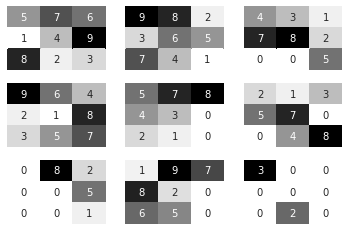

In [4]:
f.plot(np.load('solved.npy'))